<a href="https://colab.research.google.com/github/EduHdzVillasana/Proyecto_ML_BEDU/blob/main/Proyecto_ML_BEDU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto BEDU Machine Learning
**Integrantes**
* Eduardo Alán Hernández Villasana
* Cristopher Arvizu Cano
* José Antonio Aguilar Téllez

## Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
import os

warnings.simplefilter(action='ignore', category=FutureWarning)

## Carga del Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv('/content/drive/MyDrive/Datos Análisis del Crimen en Chicago/Crimes_2001-2021_clean.csv', index_col=0, )
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BEDU/Datos Análisis del Crimen en Chicago/Crimes_2001-2021_clean.csv', index_col=0, )

### Limpieza de datos y casting de fechas

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:01,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,2018-02-10 15:50:01,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,2018-02-10 15:50:01,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,2018-02-10 15:50:01,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,2018-02-10 15:50:01,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [5]:
# No existen los Distritos policiales 21 y 31. 

df = df[df["District"] != 21.0]
df = df[df["District"] != 31.0]

In [6]:
# Algunos delitos registrados salen del área de Chicago

df= df[df["Latitude"] > 41]

In [7]:
# Casting de datos booleanos
df['Arrest'] = df['Arrest'].apply(lambda x: 1 if x == True else 0)
df['Domestic'] = df['Domestic'].apply(lambda x: 1 if x == True else 0)

In [8]:
df['Date'] = pd.to_datetime(df.Date)

In [9]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Obtención de serie de tiempo

In [10]:
df["Total"] = 1

In [11]:
df["Day"] = df["Date"].apply(lambda d: d.date())

In [12]:
df[["Date","Day"]].head()

,Date,Day
0,2015-09-05 13:30:00,2015-09-05
1,2015-09-04 11:30:00,2015-09-04
3,2015-09-05 12:45:00,2015-09-05
4,2015-09-05 13:00:00,2015-09-05
5,2015-09-05 10:55:00,2015-09-05


In [13]:
df_grouped_day = df.groupby("Day")["Total"].sum()

In [14]:
df_grouped_day = pd.DataFrame({"Date":df_grouped_day.index,"Total_Crimes":df_grouped_day.values})
df_grouped_day

,Date,Total_Crimes
0,2001-01-01,274
1,2001-01-02,10
2,2001-01-03,4
3,2001-01-05,6
4,2001-01-06,6
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

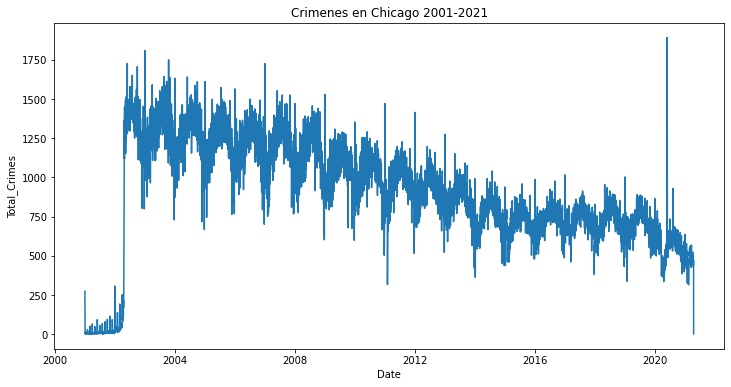

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=df_grouped_day["Date"], y=df_grouped_day["Total_Crimes"], ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

In [16]:
df_grouped_day[460:480]

,Date,Total_Crimes
460,2002-04-09,123
461,2002-04-10,128
462,2002-04-11,136
463,2002-04-12,126
464,2002-04-13,97
465,2002-04-14,119
466,2002-04-15,217
467,2002-04-16,168
468,2002-04-17,170
469,2002-04-18,198


Se observó que a finales de abril del 2002 los crímenes aumentaron muy rapido, esto se debió probablemente a que los datos no estaban recopilados correctamente, y en esas fechas se mejoró el método de recopilación. Se eliminarán los datos de antes del 25 de abril del 2002.

In [17]:
df_grouped_day = df_grouped_day[df_grouped_day["Date"] >= dt.date(2002,4,25)]
df_grouped_day

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

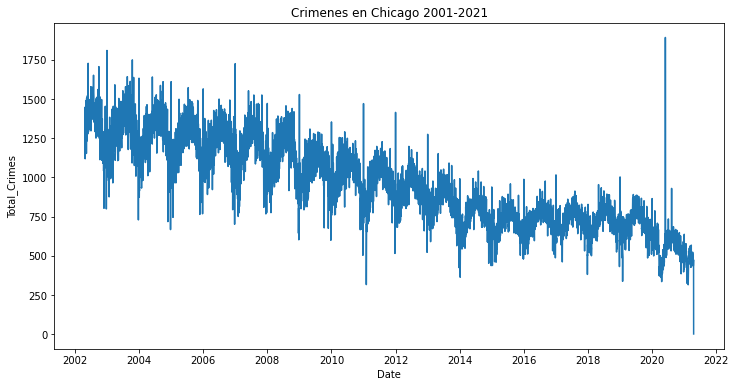

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=df_grouped_day["Date"], y=df_grouped_day["Total_Crimes"], ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

In [19]:
df_grouped_day.to_csv("crime_time_series.csv")

In [20]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [21]:
X,Y = transformarSerieADataset(df_grouped_day["Total_Crimes"].to_numpy(), 3)

In [22]:
X[:10]

array([[1294, 1367, 1254],
       [1367, 1254, 1119],
       [1254, 1119, 1447],
       [1119, 1447, 1322],
       [1447, 1322, 1450],
       [1322, 1450, 1244],
       [1450, 1244, 1296],
       [1244, 1296, 1283],
       [1296, 1283, 1254],
       [1283, 1254, 1234]])

In [23]:
Y[:10]

array([1119, 1447, 1322, 1450, 1244, 1296, 1283, 1254, 1234, 1278])

##FBpeophet


## Separación en Distritos

In [74]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Total                            int64
Day                             object
dtype: object

In [27]:
df["District"] = df["District"].apply(lambda x: int(x))

In [64]:
districts = df["District"].unique()
districts = sorted(districts)

In [65]:
districts

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25]

In [70]:
dates = df_grouped_day["Date"]

In [72]:
dates

476     2002-04-25
477     2002-04-26
478     2002-04-27
479     2002-04-28
480     2002-04-29
           ...    
7405    2021-04-14
7406    2021-04-15
7407    2021-04-16
7408    2021-04-17
7409    2021-04-18
Name: Date, Length: 6934, dtype: object

In [76]:
for district in districts:
  dict_districts[f"District {district}"] = []

In [78]:
df_grouped_day

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


In [89]:
prueba = df.groupby(["Day", "District"])["Total"].sum()

In [92]:
prueba.transpose()

Day         District
2001-01-01  1            8
            2           11
            3            9
            4           13
            5           15
                        ..
2021-04-17  20           8
            22          20
            24          10
            25          28
2021-04-18  4            1
Name: Total, Length: 156942, dtype: int64

In [80]:
df[df["District"] == 1].groupby("Day")["Total"].sum()

Day
2001-01-01     8
2001-01-05     1
2001-01-10     1
2001-01-16     1
2001-01-30     1
              ..
2021-04-13    17
2021-04-14     9
2021-04-15    15
2021-04-16    20
2021-04-17    18
Name: Total, Length: 7111, dtype: int64

In [86]:
df_list = []
for district in districts:
  tmp = df[df["District"] == district].groupby("Day")["Total"].sum()
  df_tmp = pd.DataFrame({"Date": tmp.index, f"District {district}": tmp.values})
  df_list.append(df_tmp)

In [87]:
len(df_list)

22

In [94]:
df_districts = df_grouped_day.copy()

In [96]:
df_districts.dtypes

Date            object
Total_Crimes     int64
dtype: object

In [101]:
df_districts

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


In [100]:
pd.merge(df_districts, df_list[0], how = "left", on = "Date")

,Date,Total_Crimes,District 1
0,2002-04-25,1294,48.0
1,2002-04-26,1367,68.0
2,2002-04-27,1254,32.0
3,2002-04-28,1119,30.0
4,2002-04-29,1447,91.0
...,...,...,...
6929,2021-04-14,434,9.0
6930,2021-04-15,443,15.0
6931,2021-04-16,458,20.0
6932,2021-04-17,474,18.0


In [102]:
for data in df_list:
  df_districts = pd.merge(df_districts, data, how = "left", on = "Date")

In [105]:
df_districts = df_districts.fillna(0)

In [106]:
df_districts.sample(3)

,Date,Total_Crimes,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12,District 14,District 15,District 16,District 17,District 18,District 19,District 20,District 22,District 24,District 25
265,2003-01-15,1202,41.0,64.0,76.0,73,48.0,62.0,56.0,80.0,65.0,61.0,63.0,67.0,38.0,50.0,47.0,44.0,49.0,58.0,20.0,47.0,28.0,65.0
6578,2020-04-28,452,12.0,16.0,25.0,37,23.0,29.0,29.0,32.0,24.0,27.0,40.0,25.0,10.0,19.0,11.0,16.0,6.0,13.0,8.0,18.0,11.0,21.0
5344,2016-12-11,509,34.0,16.0,27.0,28,30.0,30.0,21.0,40.0,26.0,35.0,28.0,16.0,20.0,24.0,15.0,7.0,32.0,15.0,6.0,14.0,15.0,30.0


In [107]:
df_districts.to_csv("crimes_by_districts.csv")